In [1]:
import pandas as pd

### Question 1: Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [2]:
survey = pd.read_csv('election_data.csv')

In [3]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


### Question 2 - How many samples were collected on each day?

In [4]:
survey['collection_date'].unique()

array(['5-24-2017', '5-25-2017', '5-26-2017', '5-27-2017', '5-28-2017',
       '5-29-2017', '5-30-2017', '5-31-2017', '6-1-2017'], dtype=object)

In [5]:
survey['collection_date'].value_counts()

collection_date
5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: count, dtype: int64

### Question 3 - What proportion of the total respondents were aged less than 45?

In [6]:
# survey['age']<45

In [7]:
survey['age'].dtype

dtype('O')

In [8]:
survey['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [9]:
survey.age.value_counts()

age
25      598
24      449
30      440
28      396
22      392
26      389
27      360
20      328
23      317
21      311
32      263
35      263
29      239
40      177
34      173
19      171
31      159
33      143
38      135
36      127
18      125
42      104
37       90
45       82
43       72
39       69
50       60
41       54
44       54
48       35
47       34
46       32
49       27
52       24
51       23
55       20
60       15
53       12
61       12
54       11
57       10
56        9
58        9
64        8
67        7
62        5
59        5
65        5
68        4
63        4
66        4
70        3
71        2
74        1
24ko      1
69        1
99        1
72        1
75        1
76        1
Name: count, dtype: int64

In [10]:
survey['age'].replace({'24ko':24},inplace=True)

In [11]:
survey['age'] = survey['age'].astype(int)

In [12]:
survey['age'].dtype

dtype('int32')

In [13]:
proportion = len(survey[survey['age']<45]) / len(survey) *100
proportion

93.18479685452162

### Question 4 - Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. 

In [14]:
data = survey.copy()

In [15]:
data.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [16]:
data.loc[data['age'].between(18,24), 'age_group'] = '18-25'
data.loc[data['age'].between(25,39), 'age_group'] = '25-40'
data.loc[data['age'].between(40,55), 'age_group'] = '40-55'
data.loc[data['age']>55, 'age_group'] = '55+'

In [17]:
data['age_group'].value_counts()

age_group
25-40    3844
18-25    2094
40-55     821
55+       108
Name: count, dtype: int64

In [18]:
data.sample(10)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
4467,4468,5-25-2017,Rural,Post - Graduation,"₹ 5,000 - ₹ 10,000",Plurals,BJP,Fully Dissatisfied,Somewhat Satisfied,30,Male,91,EBC,6.794300,25-40
1855,1856,5-28-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,35,EBC,0.127162,18-25
684,685,5-26-2017,Rural,Professional Education,"₹ 50,000 - ₹ 80,000",Undecided,Did not vote,Somewhat Satisfied,Fully Dissatisfied,21,Male,210,Gen,0.287927,18-25
763,764,5-27-2017,Urban,Graduate,"₹ 30,000 - ₹ 50,000",RJD,Did not vote,Fully Dissatisfied,Somewhat Satisfied,22,Male,186,BC,0.586158,18-25
641,642,5-26-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",NOTA,Did not vote,Somewhat Dissatisfied,Fully Dissatisfied,21,Male,180,Gen,0.247091,18-25
3436,3437,5-24-2017,Rural,Post - Graduation,"₹ 5,000 - ₹ 10,000",RJD,BJP,Somewhat Satisfied,Fully Dissatisfied,28,Male,102,ST,0.001089,25-40
3521,3522,5-25-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",BJP,Others,Somewhat Satisfied,Somewhat Satisfied,28,Male,104,ST,0.001089,25-40
2564,2565,5-24-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Can’t say,Fully Dissatisfied,30,Male,226,Gen,0.121450,25-40
2718,2719,5-25-2017,Rural,Graduate,"₹ 30,000 - ₹ 50,000",RJD,Did not vote,Somewhat Satisfied,Fully Dissatisfied,22,Male,238,BC,0.386643,18-25
4953,4954,5-28-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",BJP,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,8,Gen,0.276942,25-40


In [19]:
survey = data.copy()

### Question 5 - How many samples were collected for each age-group? Which age-group had the most samples?

In [20]:
survey['age_group'].value_counts()

age_group
25-40    3844
18-25    2094
40-55     821
55+       108
Name: count, dtype: int64

### Question 6 - What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [21]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40


In [22]:
survey.loc[(survey['Vote_Now'] == 'RJD') & (survey['Past_Vote'] == 'RJD')]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
9,10,5-24-2017,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059,25-40
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,Male,194,BC,0.769738,18-25
19,20,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,37,Male,200,BC,0.936383,25-40
21,22,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,29,Male,210,BC,0.713059,25-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,6847,6-1-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,31,Male,151,BC,0.483757,25-40
6848,6849,6-1-2017,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",RJD,RJD,Fully Dissatisfied,Can’t say,27,Male,143,BC,0.200389,25-40
6858,6859,6-1-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,Male,241,Gen,1.812926,18-25
6860,6861,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,25,Male,145,BC,0.528469,25-40


In [23]:
RJD_proportion = (len(survey.loc[(survey['Vote_Now'] == 'RJD') & (survey['Past_Vote'] == 'RJD')]))/(len(survey))*100
RJD_proportion

11.810106305519149

### Question 7 - For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3

In [24]:
survey.sample(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
5569,5570,5-27-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),Did not vote,Somewhat Satisfied,Somewhat Satisfied,21,Male,159,Gen,0.112914,18-25
867,868,5-27-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",RJD,RJD,Fully Dissatisfied,Somewhat Dissatisfied,25,Male,199,BC,0.969390,25-40


In [25]:
survey['CM_satisfaction'].unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [26]:
fully_satisfied = survey[survey['CM_satisfaction'] == 'Fully Satisfied']

In [27]:
satisfaction_counts = fully_satisfied['collection_date'].value_counts()
satisfaction_counts

collection_date
5-24-2017    146
5-25-2017     95
5-28-2017     92
6-1-2017      75
5-29-2017     73
5-30-2017     65
5-31-2017     62
5-26-2017     59
5-27-2017     54
Name: count, dtype: int64

In [28]:
total_counts = survey['collection_date'].value_counts()
total_counts

collection_date
5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: count, dtype: int64

In [29]:
satisfaction_proportion = satisfaction_counts/total_counts 
satisfaction_proportion

collection_date
5-24-2017    0.098715
5-25-2017    0.095190
5-26-2017    0.098662
5-27-2017    0.081203
5-28-2017    0.120894
5-29-2017    0.117742
5-30-2017    0.111684
5-31-2017    0.111311
6-1-2017     0.123558
Name: count, dtype: float64

### Question 8 - In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [30]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40


In [31]:
survey['MLA_satisfaction'].unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [32]:
fully_dissatisfied = survey[survey['MLA_satisfaction'] == 'Fully Dissatisfied']

dissatisfied_counts = fully_dissatisfied['collection_date'].value_counts()
dissatisfied_counts

collection_date
5-24-2017    887
5-25-2017    630
5-28-2017    462
5-27-2017    403
6-1-2017     385
5-30-2017    361
5-26-2017    353
5-29-2017    350
5-31-2017    321
Name: count, dtype: int64

In [33]:
total_counts = survey['collection_date'].value_counts()
total_counts

collection_date
5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: count, dtype: int64

In [34]:
dissatisfied_proportion = dissatisfied_counts / total_counts *100
dissatisfied_proportion

collection_date
5-24-2017    59.972955
5-25-2017    63.126253
5-26-2017    59.030100
5-27-2017    60.601504
5-28-2017    60.709593
5-29-2017    56.451613
5-30-2017    62.027491
5-31-2017    57.630162
6-1-2017     63.426689
Name: count, dtype: float64

In [35]:
type(dissatisfied_proportion)

pandas.core.series.Series

In [36]:
new_df = pd.DataFrame(dissatisfied_proportion)
new_df

,count
collection_date,
5-24-2017,59.972955
5-25-2017,63.126253
5-26-2017,59.030100
5-27-2017,60.601504
5-28-2017,60.709593
5-29-2017,56.451613
5-30-2017,62.027491
5-31-2017,57.630162
6-1-2017,63.426689


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

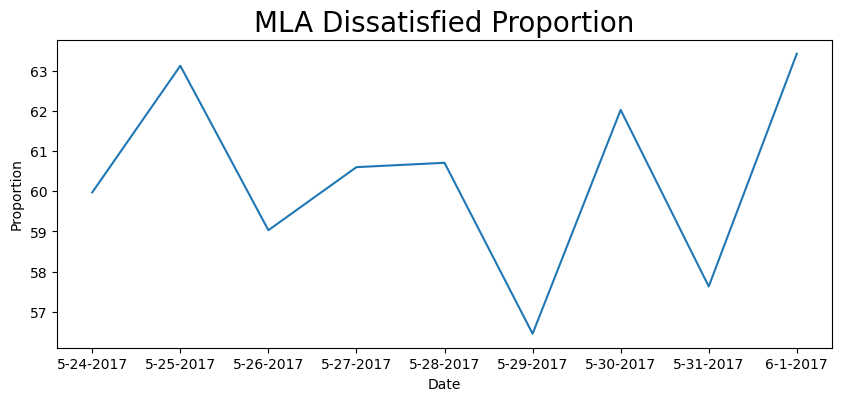

In [38]:
plt.figure(figsize=(10, 4))
sns.lineplot(data = new_df, x='collection_date',y='count')
plt.title("MLA Dissatisfied Proportion",fontsize=20)
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.show()

### Question 9 - Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [39]:
pivot_table = pd.crosstab(index=survey['Past_Vote'], columns=survey['Vote_Now'])
pivot_table

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7,1,1630,3,5,42,101,110,44,13,194,32,87,370,88,24,62,10
BSP,0,1,2,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Did not vote,8,5,231,2,1,22,41,69,10,16,83,11,51,195,20,3,31,5
HAM,2,0,25,0,1,0,3,2,2,0,4,0,0,6,4,0,1,0
INC,0,6,6,0,0,57,10,9,0,3,6,3,3,100,1,2,7,0
JAP(L),0,0,4,0,0,0,35,0,0,0,0,1,0,2,0,0,0,0
JD(U),6,10,254,2,2,45,72,279,29,9,90,18,43,435,13,25,36,6
LJP,0,0,76,1,0,4,3,6,9,2,3,0,2,17,1,0,1,0
Left Front,0,1,2,0,0,1,0,0,0,18,1,1,0,4,0,1,0,1


### Question 10 - Repeat the above question with the cell values as the sum of “weight”.

In [40]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40


In [41]:
pivot_table = pd.crosstab(index=survey['Past_Vote'], columns=survey['Vote_Now'], values=survey['weight'],aggfunc=sum)
pivot_table

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806262,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


### Question 11 - Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [42]:
sample_count = survey.groupby('age_group')[['response_id']].count()
sample_count

,response_id
age_group,
18-25,2094
25-40,3844
40-55,821
55+,108


### Question 12 - Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [43]:
survey.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40


In [44]:
survey['Vote_Now'].unique()

array(['BJP', 'RLSP', 'JAP(L)', 'RJD', 'JD(U)', 'Others', 'LJP',
       'Undecided', 'NOTA', 'Plurals', 'INC', 'RJJP', 'BSP', 'AAP',
       'Left Front', 'AIMIM', 'HAM', 'VIP'], dtype=object)

In [45]:
jdu_data = survey[survey['Vote_Now'] == 'JD(U)']
jdu_data

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
13,14,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),BJP,Somewhat Satisfied,Fully Dissatisfied,29,Male,184,Gen,0.275509,25-40
28,29,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,40-55
29,30,5-24-2017,Urban,Professional Education,"₹ 1,50,000 & above",JD(U),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,26,Male,172,BC,0.405708,25-40
59,60,5-24-2017,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,Male,171,BC,2.824391,40-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,6770,5-31-2017,Rural,12th Pass,"₹ 80,000 - ₹ 1,50,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,46,Male,166,BC,3.233006,40-55
6787,6788,6-1-2017,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,Male,144,SC,4.741094,55+
6829,6830,6-1-2017,Urban,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Somewhat Satisfied,48,Male,146,EBC,6.328899,40-55
6843,6844,6-1-2017,Urban,Post - Graduation,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Fully Satisfied,24,Male,241,BC,0.492241,18-25


In [46]:
jdu_count = jdu_data.groupby('age_group')[['response_id']].count()
jdu_count

,response_id
age_group,
18-25,181
25-40,264
40-55,71
55+,10


### Question 13 - Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [47]:
merged = pd.merge(sample_count,jdu_count,on='age_group')
merged

,response_id_x,response_id_y
age_group,,
18-25,2094,181
25-40,3844,264
40-55,821,71
55+,108,10
